In this notebook, we load the preprocessed dataset as created in 'Project_preprocessing' and build a Random Forest model. The preprocessed dataset is split into train and test sets. <br>
1. Naive Baseline - Predictions on the test set are performed using 'Naive Baseline' model (mean strategy). The baseline Root mean square error (RMSE) is thus established.
2. Default model - The default Random Forest model is evaluated with 5 fold cross validation on train set. The model is then fit on the train data and predictions are performed on test data. RMSE using default model on test data is reported.
3. Tuned model - Lastly, we optimize the parameters of the model using 5 cross validation. An extensive parameter search is performed using several grid searches. 'neg_root_mean_squared_error' is used as scoring function during grid search. The 'best estimator' model obtained after grid searches with 5 fold cross validation is finally used to perform predictions on the test set. RMSE obtained using tuned model on test set is compared with that of Default model and Naive Baseline model. 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
dataset = pd.read_csv('melbourne-airbnb.csv')
X = dataset.drop('price',axis=1)
y = dataset['price']

In [40]:
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Naive Baseline

In [41]:
#create naive baseline
from sklearn.metrics import mean_squared_error, r2_score
mean_price = np.mean(y)
y_test_naive = np.repeat(mean_price, len(y_test))
naive_rmse = mean_squared_error(y_test, y_test_naive)
naive_rmse = np.sqrt(naive_rmse)
naive_r2 = r2_score(y_test,y_test_naive)
print('Naive Baseline RMSE on test set: ' + str(round(naive_rmse,2)))
print('Naive Baseline R2 on test set: ' + str(round(naive_r2,2)))

Naive Baseline RMSE on test set: 75.75
Naive Baseline R2 on test set: -0.0


## Random Forest - Default Parameters
Evaluate default model with 5 fold cross validation on train set. Fit model on entire train set, perform predictions on test set and calculate RMSE.

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# build random forest model
model = RandomForestRegressor(random_state=123)

# evaluate default model with 5 fold cross validation on train set
scores = cross_val_score(model,X_train,y_train, cv=5, scoring='neg_root_mean_squared_error')
mean_score = abs(np.mean(scores))

#fit model on entire train set and predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate predictions made on test set
rf_def_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_def_r2 = r2_score(y_test,y_pred)

print('Random Forest (default parameters) mean cross validated RMSE on train set: ' + str(round(mean_score,2)))
print()
print('Random Forest (default parameters) R2 score on test set: ' + str(round(rf_def_r2,1)))
print()
print("Random Forest (default parameters) RMSE on test set: " + str(round(rf_def_rmse,2)))


Random Forest (default parameters) mean cross validated RMSE on train set: 50.7

Random Forest (default parameters) R2 score on test set: 0.6

Random Forest (default parameters) RMSE on test set: 49.81


## Random Forest - Hyperparameter optimization
Perform hyperparameter tuning using grid search with 5 fold cross validation on train set. Evaluate tuned model on test set and calculate RMSE.  

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


steps = [('rf',RandomForestRegressor(random_state=123) )]
pipeline = Pipeline(steps)

#define hyperparameters to tune
parameters = {'rf__n_estimators': [50,100,200],'rf__max_depth': [9,10,11],
              'rf__min_samples_split': [2,4]}

#perform grid search using cross validation
grid1_rf = GridSearchCV(pipeline, param_grid=parameters, cv=5,scoring='neg_root_mean_squared_error')
grid1_rf.fit(X_train, y_train)

print('Best Parameters with grid1:') 
print(grid1_rf.best_params_)
print()
grid1_rmse = abs(grid1_rf.best_score_)
best_std = grid1_rf.cv_results_['std_test_score'][grid1_rf.best_index_]
print('Mean cross validated RMSE with best estimator grid1: '+ str(round(grid1_rmse,2)) + ', Standard deviation: ' + str(round(best_std,2)))


Best Parameters with grid1:
{'rf__max_depth': 11, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

Mean cross validated RMSE with best estimator grid1: 51.06, Standard deviation: 0.92


In [44]:
#further tuning with other parameters
steps = [('rf',RandomForestRegressor(random_state=123, min_samples_split=2 ))]
pipeline = Pipeline(steps)

#define hyperparameters to tune
parameters = {'rf__n_estimators': [200,350,500],'rf__max_depth': [11,12,13],
              'rf__min_samples_leaf': [1,3]}

#perform grid search using cross validation
grid2_rf = GridSearchCV(pipeline, param_grid=parameters, cv=5,scoring='neg_root_mean_squared_error')
grid2_rf.fit(X_train, y_train)

print('Best Parameters with grid2:') 
print(grid2_rf.best_params_)
print()
grid2_rmse = abs(grid2_rf.best_score_)
best_std = grid2_rf.cv_results_['std_test_score'][grid2_rf.best_index_]
print('Mean cross validated RMSE with best estimator grid2: '+ str(round(grid2_rmse,2)) + ', Standard deviation: ' + str(round(best_std,2)))


Best Parameters with grid2:
{'rf__max_depth': 13, 'rf__min_samples_leaf': 1, 'rf__n_estimators': 500}

Mean cross validated RMSE with best estimator grid2: 50.6, Standard deviation: 0.98


In [49]:
#further tuning with other parameters
steps = [('rf',RandomForestRegressor(random_state=123, min_samples_split=2, min_samples_leaf= 1,n_estimators=500 ))]
pipeline = Pipeline(steps)

#define hyperparameters to tune
parameters = {'rf__max_features': ['auto', 'sqrt'],
              'rf__max_depth': [14,15]}

#perform grid search using cross validation
grid3_rf = GridSearchCV(pipeline, param_grid=parameters, cv=5,scoring='neg_root_mean_squared_error')
grid3_rf.fit(X_train, y_train)

print('Best Parameters with grid3:') 
print(grid3_rf.best_params_)
print()
grid3_rmse = abs(grid3_rf.best_score_)
best_std = grid3_rf.cv_results_['std_test_score'][grid3_rf.best_index_]
print('Mean cross validated RMSE with best estimator grid3: '+ str(round(grid3_rmse,2)) + ', Standard deviation: ' + str(round(best_std,2)))


Best Parameters with grid3:
{'rf__max_depth': 15, 'rf__max_features': 'sqrt'}

Mean cross validated RMSE with best estimator grid3: 49.5, Standard deviation: 1.07


In [50]:
#predict using model with best estimator from grid search
y_pred_tuned = grid3_rf.predict(X_test)
rf_tuned_r2 = r2_score(y_test,y_pred_tuned)
rf_tuned_rmse = mean_squared_error(y_test, y_pred_tuned)
rf_tuned_rmse = np.sqrt(rf_tuned_rmse)
print('R2 score using tuned Random Forest on test set: ' + str(round(rf_tuned_r2,1)))
print()
print('RMSE using tuned Random Forest on test set: ' + str(round(rf_tuned_rmse,2)))

R2 score using tuned Random Forest on test set: 0.6

RMSE using tuned Random Forest on test set: 48.5


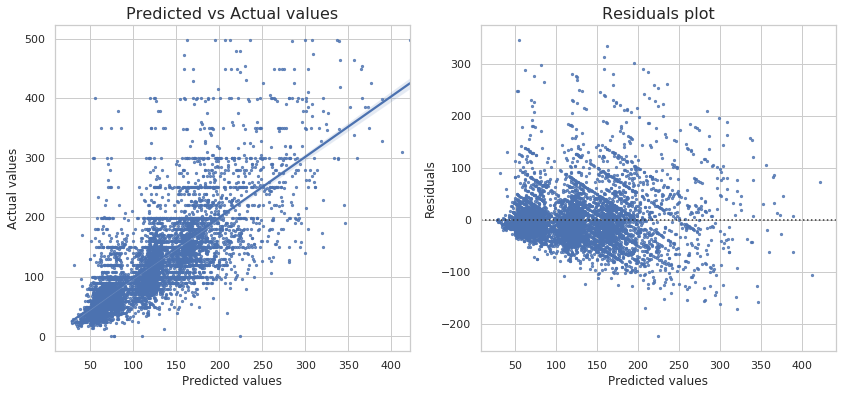

In [51]:
#plot predicted vs actual values and residuals plot

residuals = y_test-y_pred_tuned

sns.set(style="whitegrid")
fig,(ax1,ax2) = plt.subplots(1,2, figsize= (14,6))
sns.regplot(x = y_pred_tuned, y=y_test,scatter_kws={'s':5}, ax=ax1)
ax1.set_xlabel('Predicted values',fontsize=12)
ax1.set_ylabel('Actual values',fontsize=12)
ax1.set_title('Predicted vs Actual values', fontsize = 16)
sns.residplot(x=y_pred_tuned, y=residuals,scatter_kws={'s':5}, ax=ax2)
ax2.set_xlabel('Predicted values',fontsize=12)
ax2.set_ylabel('Residuals',fontsize=12)
ax2.set_title('Residuals plot', fontsize=16);

The predicted values using tuned model follow the overall trend of actual values. Predictions are more accurate in the range of ~ $50-200. Beyond this range, the model performance is poor and mostly under or overestimating the price.

In [52]:
#final summary
print('Summarizing: ')
print()
print('Naive Baseline RMSE on test set: ' + str(round(naive_rmse,2)))
print()
print("Random Forest (default parameters) RMSE on test set: " + str(round(rf_def_rmse,2)))
print()
print('Random Forest (tuned parameters) RMSE on test set: ' + str(round(rf_tuned_rmse,2)))


Summarizing: 

Naive Baseline RMSE on test set: 75.75

Random Forest (default parameters) RMSE on test set: 49.81

Random Forest (tuned parameters) RMSE on test set: 48.5


A significantly lower RMSE using Random Forest model was obtained than Naive Baseline model. The model was further optimized by tuning hyperparameters and a minor improvement in performance was obtained over the model with default parameters.